In [1]:
import select_work
import pausing
import codons
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.transforms
import numpy as np

In [2]:
def get_gradient_labels(name_order, small=False): 
    gradient_fractions = [select_work.gerashchenko_fraction(name) for name in name_order]
    if small:
        gradient_labels = [str(num) + \
                           (' / {0}'.format(denom) if denom != 1 else '') + \
                           ('x ({0})'.format(rep[-1]) if rep != '' else 'x')
                           for num, denom, rep in gradient_fractions
                          ]
    else:   
        gradient_labels = [str(num) + \
                           (' / {0}'.format(denom) if denom != 1 else '') + \
                           ('x, {0}'.format(rep) if rep != '' else 'x')
                           for num, denom, rep in gradient_fractions
                          ]

    return gradient_labels

In [3]:
def draw_gradient(ax, how_many, height=1):
    trans = matplotlib.transforms.blended_transform_factory(ax.transData, ax.transAxes)
    points = [[0, 1.07],
              [how_many - 1, 1.07],
              [how_many - 1, 1.07 + 0.05 * height],
             ]
    triangle = matplotlib.patches.Polygon(np.array(points),
                                          transform=trans,
                                          clip_on=False,
                                          color='black',
                                          fill=False,
                                         )

    ax.add_patch(triangle)

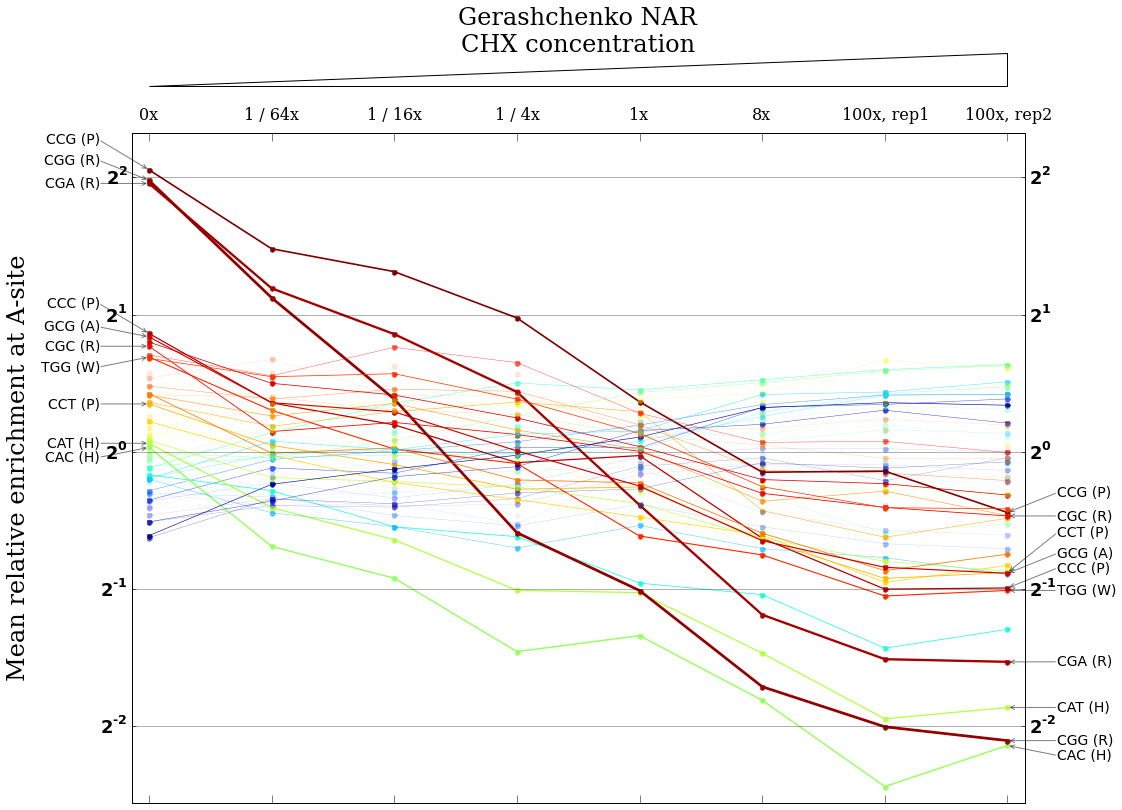

In [31]:
fig, ax = plt.subplots(figsize=(16, 12))

relevant_experiments = select_work.get_gerashchenko_nar_experiments('oxidative')
enrichments = {exp.name: exp.read_file('stratified_mean_enrichments') for exp in relevant_experiments}

name_order = [exp.name for exp in relevant_experiments]
_ = pausing.plot_enrichments_across_conditions(enrichments,
                                               0,
                                               name_order,
                                               highlight_movement=True,
                                               by_rank=False,
                                               label_rules=(10, 'log', abs),
                                               log_scale=True,
                                               ax=ax,
                                               force_ylims=(0.17, 5),
                                               print_deltas=False,
                                               label_offset=50,
                                               label_size=14,
                                               marker_size=10,
                                               ylabel_size=18,
                                              )

gradient_labels = get_gradient_labels(name_order)
ax.set_xticklabels(gradient_labels)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, direction='in', pad=10, length=8)
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_family('serif')
    
ax.set_xlabel('Gerashchenko NAR\nCHX concentration', size=24, labelpad=55, family='serif')
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Mean relative enrichment at A-site', size=24, labelpad=70, family='serif')

draw_gradient(ax, len(name_order))

fig.savefig('paper/changes_across_gradient.png', bbox_inches='tight')
fig.savefig('bdibs/changes_across_gradient.png', bbox_inches='tight')

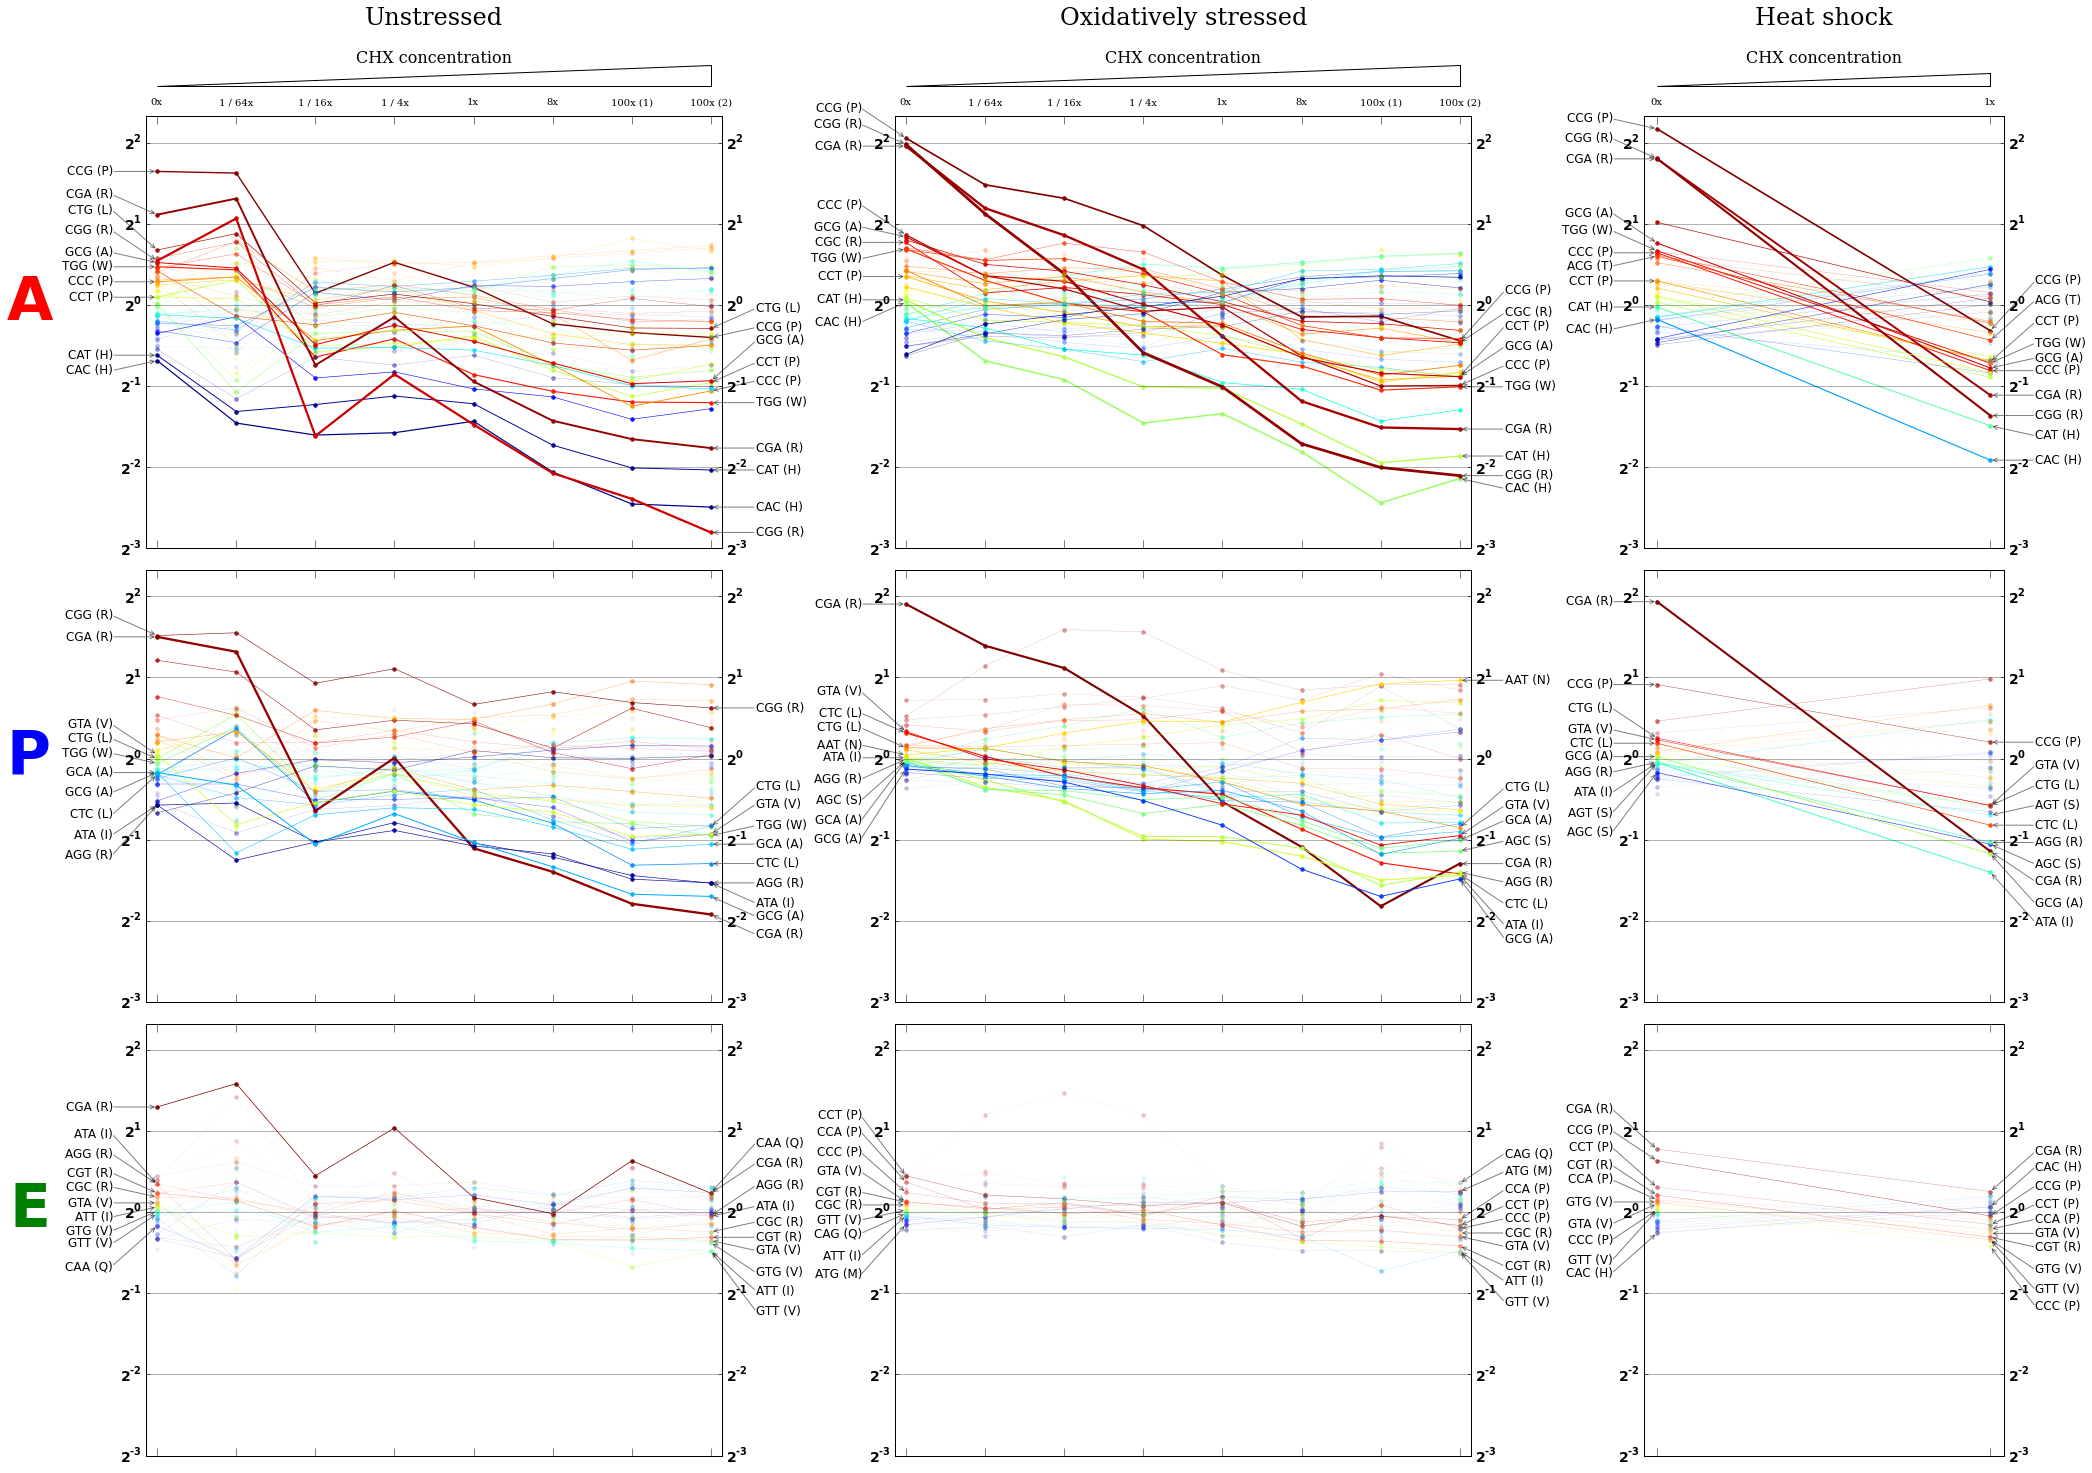

In [4]:
gs_kwargs = dict(left=0.05,
                 right=0.95,
                 wspace=0.30,
                 hspace=0.05,
                )

fig, axs = plt.subplots(3, 3, figsize=(32, 24), gridspec_kw=gs_kwargs)

relevant_experiments = select_work.get_gerashchenko_nar_experiments('unstressed') + select_work.get_gerashchenko_nar_experiments('oxidative') + select_work.get_gerashchenko_nar_experiments('heat')
enrichments = {exp.name: exp.read_file('stratified_mean_enrichments') for exp in relevant_experiments}

def plot_col(condition, axs):
    name_order = [exp.name for exp in relevant_experiments if condition in exp.name]
    
    enrichment_kwargs = {'highlight_movement': True,
                         'by_rank': False,
                         'label_rules': (10, 'log', abs),
                         'log_scale': True,
                         'force_ylims': (2**-3, 5),
                         'print_deltas': False,
                         'heat_exception': condition == 'heat',
                         'marker_size': 8,
                         'label_size': 12,
                         'label_offset': 45,
                        }
    
    pausing.plot_enrichments_across_conditions(enrichments, 0, name_order, ax=axs[0], **enrichment_kwargs)
    pausing.plot_enrichments_across_conditions(enrichments, -1, name_order, ax=axs[1], **enrichment_kwargs)
    pausing.plot_enrichments_across_conditions(enrichments, -2, name_order, ax=axs[2], **enrichment_kwargs)
                                                   
    tick_kwargs = {'labelbottom': False,
                   'direction': 'in',
                   'pad': 10,
                   'length': 8,
                  }
    axs[0].xaxis.set_tick_params(labeltop=True, **tick_kwargs)
    axs[1].xaxis.set_tick_params(labeltop=False, **tick_kwargs)
    axs[2].xaxis.set_tick_params(labeltop=False, **tick_kwargs)
    gradient_labels = get_gradient_labels(name_order, small=True)
    axs[0].set_xticklabels(gradient_labels)
    for label in axs[0].get_xticklabels():
        label.set_family('serif')
    axs[0].set_xlabel('CHX concentration', size=16, labelpad=35, family='serif')
    axs[0].xaxis.set_label_position('top')
    
    if condition == 'heat':
        how_many = 5
        height = 5. / 8
    else:
        how_many = len(name_order)
        height = 1
            
    draw_gradient(axs[0], how_many, height) 
    
label_kwargs = {'size': 60,
                'rotation': 0,
                'labelpad': 90,
                'weight': 'bold',
               }
axs[0, 0].set_ylabel('A', color='red', **label_kwargs)
axs[1, 0].set_ylabel('P', color='blue', **label_kwargs)
axs[2, 0].set_ylabel('E', color='green', **label_kwargs)
    
plot_col('unstressed', axs[:, 0])
plot_col('oxidative', axs[:, 1])
plot_col('heat', axs[:, 2])

for ax in axs[:, 2]:
    left, bottom, width, height = ax.get_position().bounds
    ax.set_position([left, bottom, width * 5. / 8, height])
    
for ax, condition in zip(axs[0], ['Unstressed', 'Oxidatively stressed', 'Heat shock']):
    ax.set_title(condition, size=24, y=1.2, family='serif')
    
fig.savefig('paper/changes_across_gradient_all.pdf', bbox_inches='tight')
fig.savefig('paper/changes_across_gradient_all.png', bbox_inches='tight')

In [27]:
import Sequencing.utilities
from collections import defaultdict

In [49]:
wobble_to_codons = defaultdict(list)

for codon in codons.codon_to_anticodon:
    anticodon = codons.codon_to_anticodon[codon]
    wobble = (codons.dna_to_rna(codon[2]), codons.dna_to_rna(anticodon[0]))
    wobble_to_codons[wobble].append(codon)

In [50]:
for wobble in wobble_to_codons:
    gs_kwargs = dict(left=0.05,
                     right=0.95,
                     wspace=0.30,
                     hspace=0.05,
                    )

    fig, axs = plt.subplots(3, 3, figsize=(32, 24), gridspec_kw=gs_kwargs)

    relevant_experiments = select_work.get_gerashchenko_nar_experiments('unstressed') + select_work.get_gerashchenko_nar_experiments('oxidative') + select_work.get_gerashchenko_nar_experiments('heat')
    enrichments = {exp.name: exp.read_file('stratified_mean_enrichments') for exp in relevant_experiments}

    def plot_col(condition, axs):
        name_order = [exp.name for exp in relevant_experiments if condition in exp.name]

        enrichment_kwargs = {'highlight_movement': False,
                             'force_highlight': wobble_to_codons[wobble],
                             'force_label': wobble_to_codons[wobble],
                             'by_rank': False,
                             'label_rules': (0, 'log', abs),
                             'log_scale': True,
                             'force_ylims': (2**-3, 5),
                             'print_deltas': False,
                             'heat_exception': condition == 'heat',
                             'marker_size': 8,
                             'label_size': 12,
                             'label_offset': 45,
                            }

        pausing.plot_enrichments_across_conditions(enrichments, 0, name_order, ax=axs[0], **enrichment_kwargs)
        pausing.plot_enrichments_across_conditions(enrichments, -1, name_order, ax=axs[1], **enrichment_kwargs)
        pausing.plot_enrichments_across_conditions(enrichments, -2, name_order, ax=axs[2], **enrichment_kwargs)

        tick_kwargs = {'labelbottom': False,
                       'direction': 'in',
                       'pad': 10,
                       'length': 8,
                      }
        axs[0].xaxis.set_tick_params(labeltop=True, **tick_kwargs)
        axs[1].xaxis.set_tick_params(labeltop=False, **tick_kwargs)
        axs[2].xaxis.set_tick_params(labeltop=False, **tick_kwargs)
        gradient_labels = get_gradient_labels(name_order, small=True)
        axs[0].set_xticklabels(gradient_labels)
        for label in axs[0].get_xticklabels():
            label.set_family('serif')
        axs[0].set_xlabel('CHX concentration', size=16, labelpad=35, family='serif')
        axs[0].xaxis.set_label_position('top')

        if condition == 'heat':
            how_many = 5
            height = 5. / 8
        else:
            how_many = len(name_order)
            height = 1

        draw_gradient(axs[0], how_many, height) 

    label_kwargs = {'size': 60,
                    'rotation': 0,
                    'labelpad': 90,
                    'weight': 'bold',
                   }
    axs[0, 0].set_ylabel('A', color='red', **label_kwargs)
    axs[1, 0].set_ylabel('P', color='blue', **label_kwargs)
    axs[2, 0].set_ylabel('E', color='green', **label_kwargs)

    plot_col('unstressed', axs[:, 0])
    plot_col('oxidative', axs[:, 1])
    plot_col('heat', axs[:, 2])

    for ax in axs[:, 2]:
        left, bottom, width, height = ax.get_position().bounds
        ax.set_position([left, bottom, width * 5. / 8, height])

    for ax, condition in zip(axs[0], ['Unstressed', 'Oxidatively stressed', 'Heat shock']):
        ax.set_title(condition, size=16, y=1.17, family='serif')
        
    fig.suptitle('{0}-{1}'.format(*wobble), size=30, family='serif')
    fig.savefig('paper/changes_across_gradient_all_{0}-{1}.png'.format(*wobble), bbox_inches='tight')
    plt.close(fig)